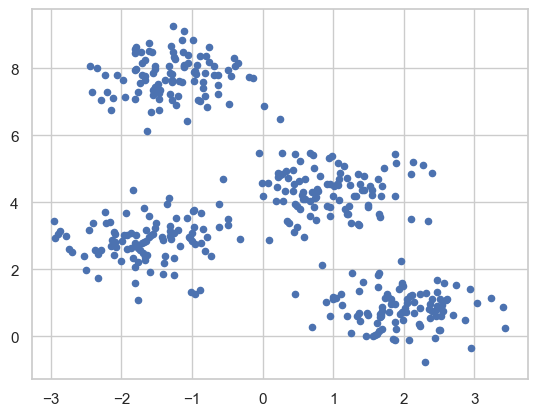

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set_theme(style="whitegrid")
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6,
                       random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=20)
plt.show()

In [3]:
# Создадим объект KMeans вместе с указанием количества кластеров
# и обучим модель и сделаем прогноз следующим образом
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

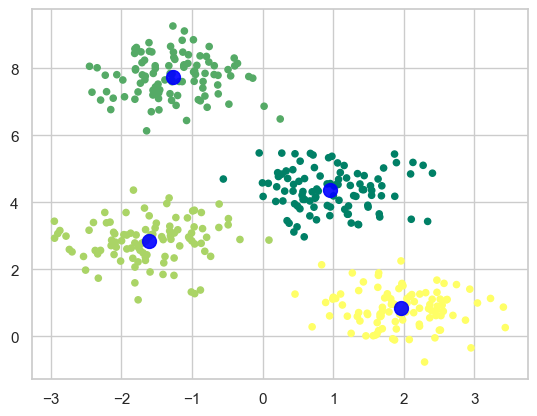

In [4]:
# Построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap="summer")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=100, alpha=0.9)
plt.show()

In [5]:
# Приведем кластеризацию k-средних к набору простых чисел
# K-means попытается идентифицировать похожие цифры
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

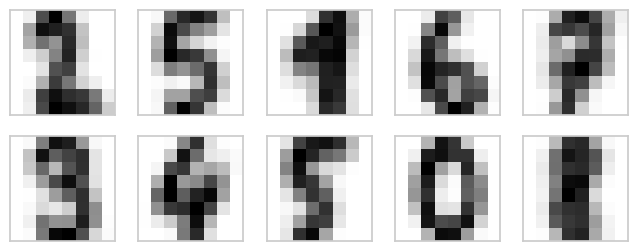

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)

In [8]:
import numpy as np

x = np.array([[5, 3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 45],
              [85, 70],
              [71, 80],
              [60, 78],
              [55, 52],
              [80, 91], ])
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x)
kmeans.cluster_centers_.shape

(3, 2)

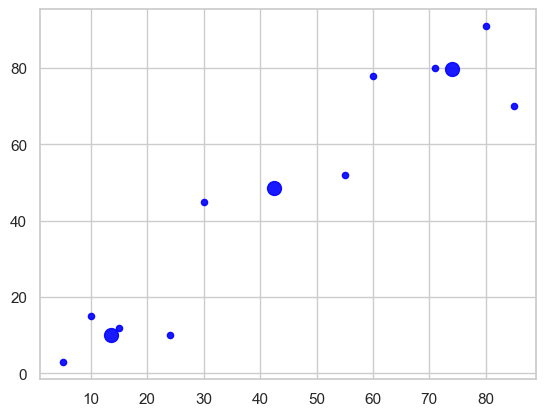

In [9]:
centers = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1], c="blue", s=20, alpha=0.9)
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=100, alpha=0.9)
plt.show()

In [11]:
iris = sns.load_dataset("iris")
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(iris.iloc[:, :-1])
kmeans.cluster_centers_.shape

(3, 4)

In [12]:
centers = kmeans.cluster_centers_
centers

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

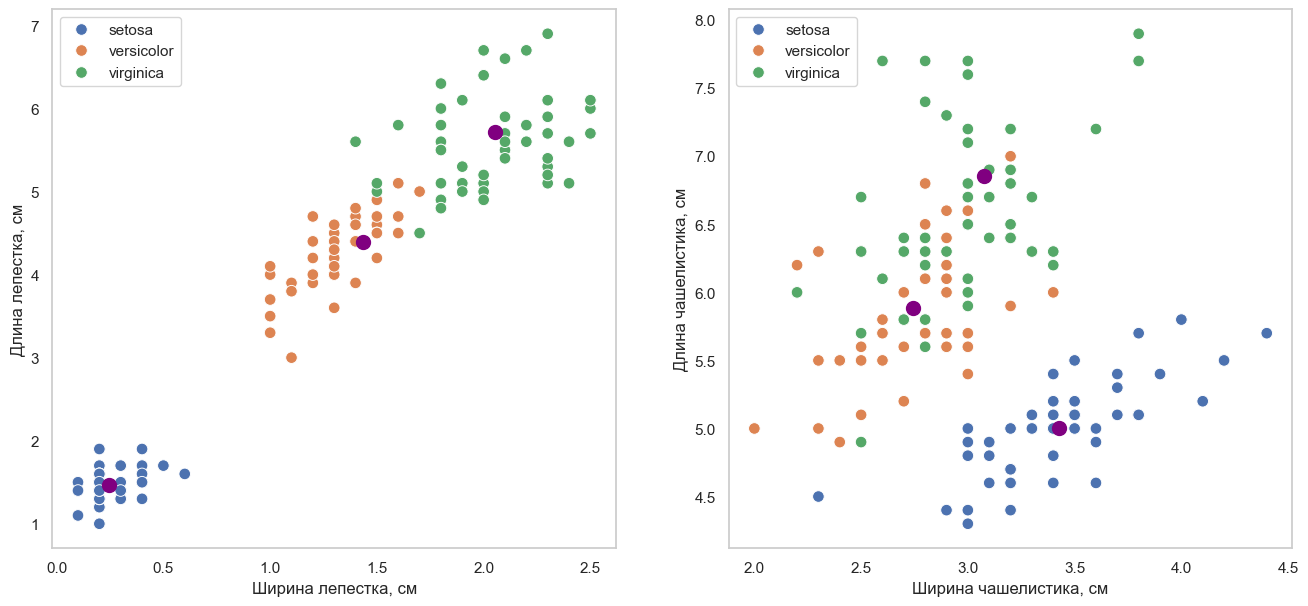

In [17]:
plt.figure(figsize=(16, 7))
# Левый график
plt.subplot(121)
sns.scatterplot(x='petal_width', y='petal_length', data=iris,
                hue='species', s=70)
plt.scatter(centers[:, 3], centers[:, 2], color="purple", s=100)
plt.xlabel("Ширина лепестка, см")
plt.ylabel("Длина лепестка, см")
plt.legend(loc=2)
plt.grid()

# Правый график
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length',
                hue='species', s=70)
plt.scatter(centers[:, 1], centers[:, 0], color="purple", s=100)
plt.xlabel("Ширина чашелистика, см")
plt.ylabel("Длина чашелистика, см")
plt.legend(loc=2)
plt.grid()

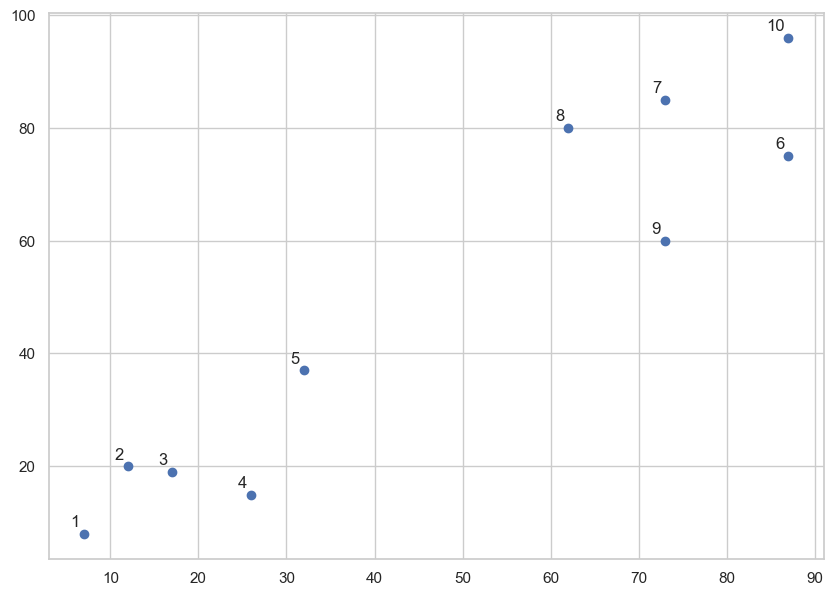

In [18]:
X = np.array(
    [[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73,
                                                                85], [62, 80], [73, 60], [87, 96]])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:, 1], label="True Position")
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy=(x, y), xytext=(-3, 3), textcoords="offset points",
        ha="right", va="bottom"
    )
plt.show()

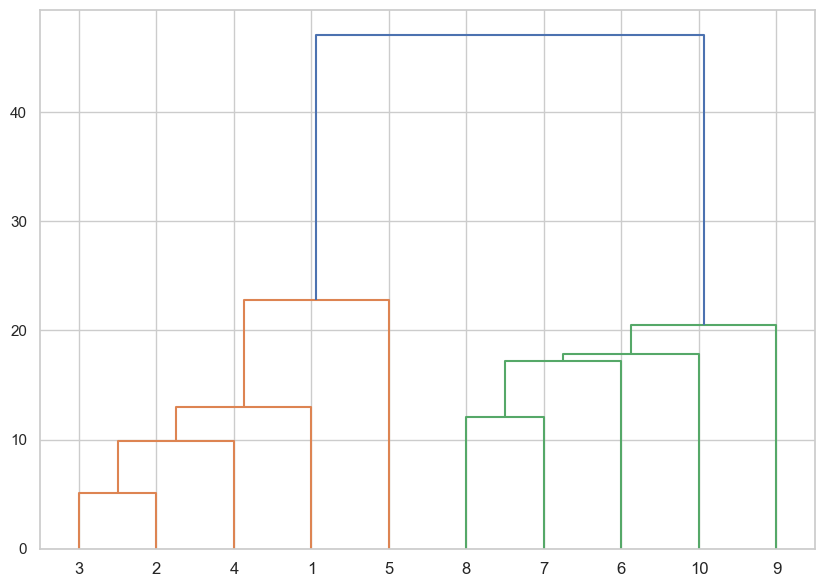

In [19]:
# Построим дендрограмму для точек данных с помощью библиотеки scipy
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, "single")
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(
    linked, orientation="top", labels=labelList, distance_sort="descending", show_leaf_counts=True
)
plt.show()

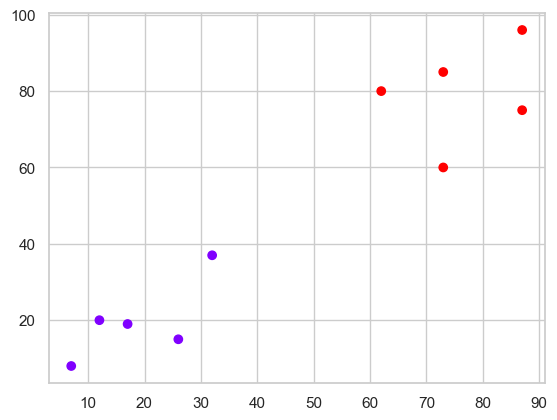

In [20]:
# Далее нам нужно импортировать класс для кластеризации и вызвать его
# метод fit_predict для прогнозирования кластера.
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, metric="euclidean", linkage="ward")
cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap="rainbow")

In [21]:
# В этом примере мы выполним иерархическую кластеризацию реальных
# данных и посмотрим, как ее можно использовать для решения реальной
# проблемы

import pandas as pd

url = "https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
customer_data.shape

(200, 5)

In [23]:
data = customer_data.iloc[:, 3:5].values

<Figure size 5040x2160 with 0 Axes>

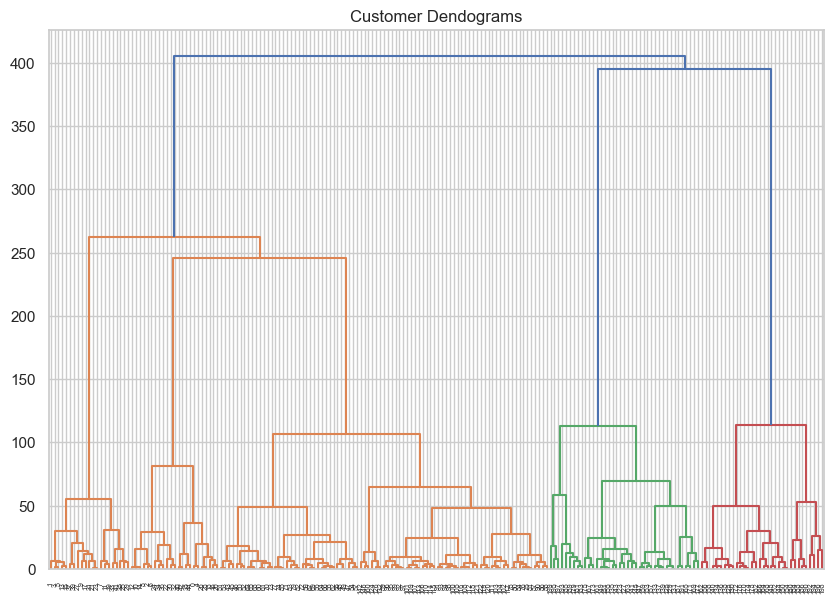

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method="ward"))

In [25]:
cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

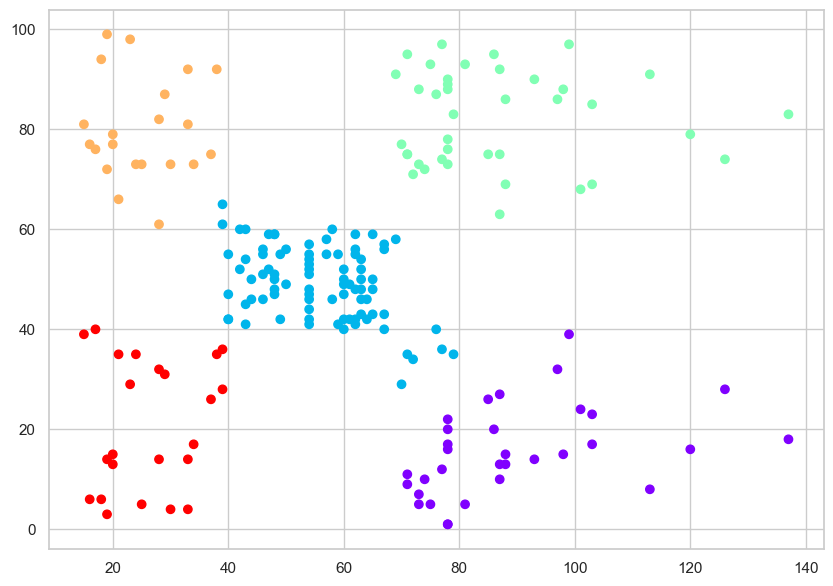

In [26]:
# В качестве последнего шага давайте построим кластеры,
# чтобы увидеть, как на самом деле были сгруппированы наши данные

plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap="rainbow")

In [27]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
x = iris.iloc[:, :2].values
x[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

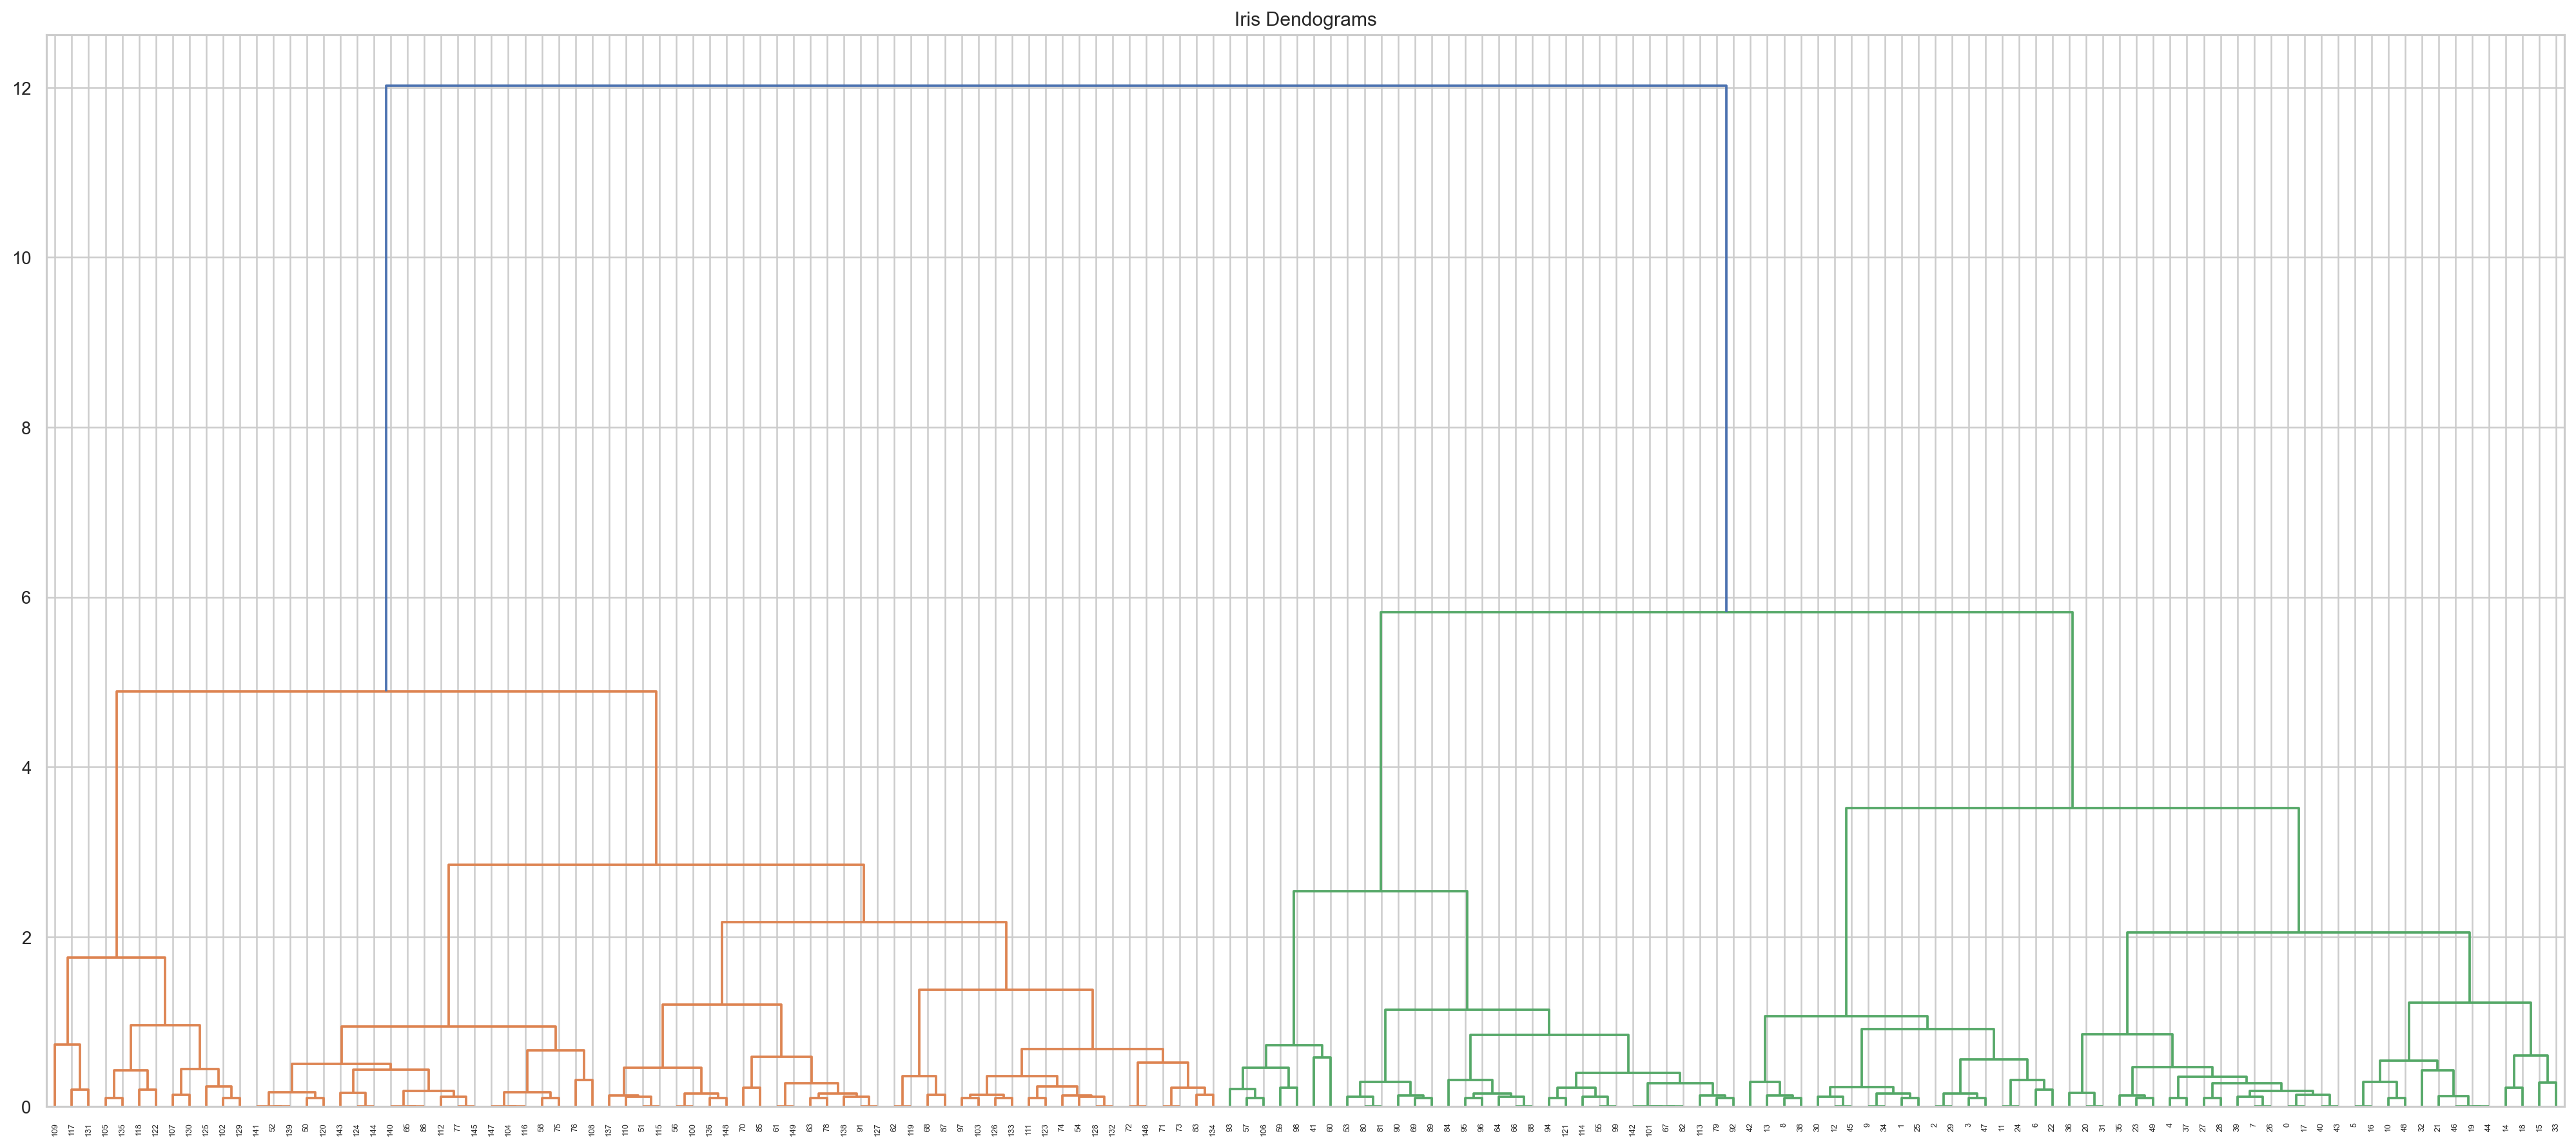

In [37]:
linked = linkage(X, 'single')
plt.figure(figsize=(28,12), dpi=180)
plt.title("Iris Dendograms")
dend = shc.dendrogram(shc.linkage(x, method="ward"))

In [38]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="ward", metric="euclidean")
cluster.fit_predict(x)

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 2, 4, 1,
       1, 4, 1, 4, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

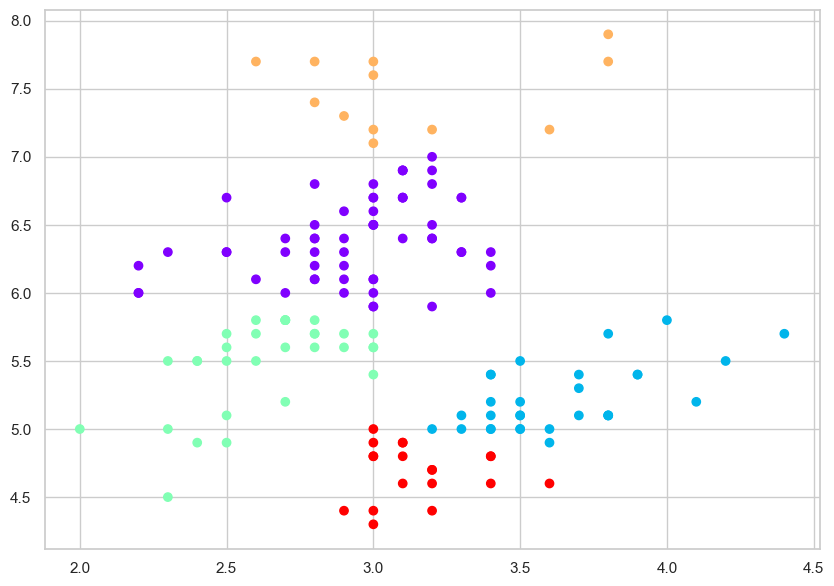

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 1], x[:, 0], c=cluster.labels_, cmap="rainbow")